# simple DNN for the MNIST data set

This code will train a 3-layer DNN on the MNIST data, and output a prediction for `input.bmp`. The image is in grayscale (white on black) and must have a size of 28x28.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

Using TensorFlow backend.


## load training data

In [5]:
labels = idx2numpy.convert_from_file('train-labels.idx')
images = idx2numpy.convert_from_file('train-images.idx')

n_samples = len(labels)  # number of labeled pairs
images_flat =images.reshape((n_samples, -1))

## load test data

In [4]:
test_labels = idx2numpy.convert_from_file('t10k-labels.idx')
test_images = idx2numpy.convert_from_file('t10k-images.idx')

n_samples = len(test_labels)
test_images = test_images.reshape((n_samples, -1))  # flatten images for input layer

## construct model

In [6]:
model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## training

In [8]:
model.fit(
    images_flat,
    keras.utils.to_categorical(labels),
    validation_data=(test_images[:1000], keras.utils.to_categorical(test_labels[:1000])),
    batch_size=32,
    epochs=20
)

Train on 60000 samples, validate on 1000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 64us/step - loss: 3.1529 - acc: 0.2089 - val_loss: 1.8660 - val_acc: 0.2920
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 1.8336 - acc: 0.3074 - val_loss: 1.6811 - val_acc: 0.3170
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 1.5637 - acc: 0.3889 - val_loss: 1.4163 - val_acc: 0.4570
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 1.3842 - acc: 0.4600 - val_loss: 1.1242 - val_acc: 0.5450
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 1.2197 - acc: 0.5255 - val_loss: 0.9892 - val_acc: 0.5950
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 1.0661 - acc: 0.5965 - val_loss: 0.8333 - val_acc: 0.7130
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.8690 - acc: 0.7084 - val_loss: 0.6290 - val_acc:

In [15]:
_, acc = model.evaluate(test_images[1000:], keras.utils.to_categorical(test_labels[1000:]))
print(f'Accuracy on rest of test data: {acc:.2f}')

9000/9000 [==============================] - 0s 30us/step
Accuracy on rest of test data: 0.92


<BarContainer object of 10 artists>

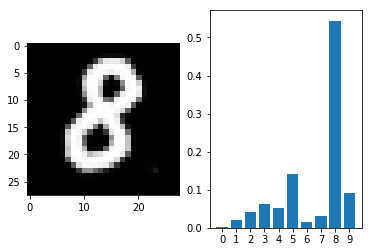

In [18]:
from PIL import Image

# load input image into array
input_image = Image.open('input.bmp')
array = np.array(input_image.getdata())[:,0]

x = np.arange(10) # digits
y = model.predict(array.reshape((1, 784))).reshape(10) # categorical output

# Draw input image
plt.subplot(121)
plt.imshow(array.reshape((28, 28)), cmap='Greys_r')

# Show output
plt.subplot(122)
plt.
plt.xticks(x)
plt.bar(x, y)